In [1]:
import functools
import jax
import os
import html

from datetime import datetime
from jax import numpy as jp
jax.config.update("jax_debug_nans", False)
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

from IPython.display import HTML, clear_output, display

import flax
from brax import envs
from brax.io import model
from brax.io import json
from brax.io import html

import shutil

from src.pods.Pods import train as train_pods
from src.hds.Hds import train as train_hds
from src.env.Pendulum import InvertedPendulum
import pickle




In [2]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)
print(jax.devices())

cpu
[CpuDevice(id=0)]


In [3]:
env = InvertedPendulum(target=jp.array([1]))
state = jax.jit(env.reset)(rng=jax.random.PRNGKey(seed=0))

#HTML(html.render(env.sys, [state.pipeline_state]))

In [4]:
ckpt_dir = './tmp/flax_ckpt'

if os.path.exists(ckpt_dir):
    shutil.rmtree(ckpt_dir)  # Remove any existing checkpoints from the last notebook run.

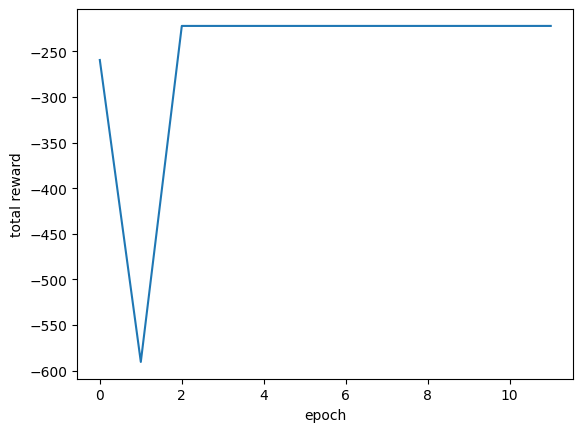

In [5]:

def progress_f(x_data,y_data,epoch,reward):
    print(reward)
    x_data.append(epoch)
    y_data.append(reward)
    clear_output(wait=True)
    plt.xlabel('epoch')
    plt.ylabel('total reward')
    plt.plot(x_data, y_data)
    plt.show()

policy = train_hds(env,trajectory_length=50 ,num_samples=100,epochs=20, inner_epochs=20, alpha_a= 1.0, init_learning_rate=1e-3, init_noise=0.0, noise_decay=0.5, progress_fn=progress_f) 
#policy = train_pods(env,trajectory_length=50 ,num_samples=100,epochs=50, inner_epochs=20, alpha_a=0.0, init_learning_rate=1e-3, progress_fn=progress_f)

In [ ]:
f = open("reward.txt", "w")
g = open("actions.txt", "w")
inference_fn = policy()
rollout = []
rng = jax.random.PRNGKey(seed=1)
state = env.reset(rng=rng)
reward = []
actions = []
for _ in range(1000):
  rollout.append(state.pipeline_state)
  act_rng, rng = jax.random.split(rng)
  #print(state.obs)
  act = inference_fn(state.obs)
  print(act)
  reward.append(state.reward)
  state = env.step(state, act)
  #print(state.reward)
  actions.append(act)

  
print(reward, file=f)
print(actions, file=g)

[0.04773938]
[0.01076116]
[0.00462702]
[0.0004392]
[-0.0037428]
[-0.0081414]
[-0.01268159]
[-0.01718457]
[-0.0214738]
[-0.02706735]
[-0.03411684]
[-0.0433038]
[-0.0533538]
[-0.06236375]
[-0.07094116]
[-0.08027489]
[-0.08146508]
[-0.0781]
[-0.07598564]
[-0.0741878]
[-0.07087045]
[-0.06764721]
[-0.06584045]
[-0.06119479]
[-0.05559406]
[-0.04986242]
[-0.04314686]
[-0.03513982]
[-0.02728671]
[-0.01784587]
[-0.00768224]
[0.00158998]
[0.01033491]
[0.01974503]
[0.02909999]
[0.03819436]
[0.04748203]
[0.05600533]
[0.06184715]
[0.06873503]
[0.07149672]
[0.0736016]
[0.07904451]
[0.08017674]
[0.05202225]
[-0.25284075]
[-0.88391582]
[0.67463063]
[0.02423059]
[0.1361187]
[0.04269594]
[0.05263694]
[0.0497707]
[0.03411425]
[-0.03105701]
[-0.11202006]
[-0.2662523]
[-0.35067866]
[-0.6520871]
[-0.93130476]
[-0.99579118]
[-0.99768627]
[-0.9904576]
[-0.74994864]
[-0.54883464]
[-0.85559761]
[-0.99898983]
[-0.99999969]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]


In [ ]:
yes=html.render(env.sys.replace(), rollout)
with open("data.html", "w") as file:
    file.write(yes)